# Image classification using TensorFlow

### Springboard Career Track Capstone Project 2

#### Linear Model in TensorFlow

#### Import libraries

In [2]:
import keras
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, Adadelta, SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, History, CSVLogger

import time
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np
from keras import backend as K
K.set_image_dim_ordering('tf')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.pylabtools import figsize

Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


#### Import data

Data acquired from keras.datasets

In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
# Normalize to values between 0 and 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [5]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Reshape for baseline model (no CNN)

In [5]:
x_train = np.reshape(X_train, (X_train.shape[0], -1))
x_test = np.reshape(X_test, (X_test.shape[0], -1))

In [6]:
x_train.shape, x_test.shape

((50000, 3072), (10000, 3072))

#### Create baseline model

Baseline models run with smaller than default learning rates for SGD and Adam and default for Adadelta.

All three models run for 50 epochs and a batch size of 1000, even though this may not be optimal in any way.

In [7]:
# define baseline model

num_pixels = 32 * 32 * 3
num_classes = 10

def baseline_model(optimizer='Adadelta'):
    # create model
    np.random.seed(911)
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    SGD = keras.optimizers.SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False)
    Adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    Adam = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [8]:
learning_rate=.0001
optimizer=SGD(lr=learning_rate)

# build the model
model_SGD = baseline_model()

# Fit the model
csv_logger = CSVLogger('model_SGD.log')

start = time.time()
SGD_res = model_SGD.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=1000, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
model_SGD.save('SGD_res.h5')

# Final evaluation of the model
scores = model_SGD.evaluate(x_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Baseline Accuracy, SGD optimizer: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/step - loss: 11.7808 - acc: 0.1395 - val_loss: 11.1364 - val_acc: 0.1653
Epoch 2/50
50000/50000 [==============================] - 2s 38us/step - loss: 9.8191 - acc: 0.1647 - val_loss: 7.0421 - val_acc: 0.2065
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 4.1845 - acc: 0.2317 - val_loss: 2.2048 - val_acc: 0.2745
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0517 - acc: 0.3116 - val_loss: 1.8984 - val_acc: 0.3294
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9306 - acc: 0.3320 - val_loss: 1.9253 - val_acc: 0.3380
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8690 - acc: 0.3536 - val_loss: 1.9884 - val_acc: 0.3335
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8298 - acc: 0.3664 - val_loss: 1.7284 - val_a

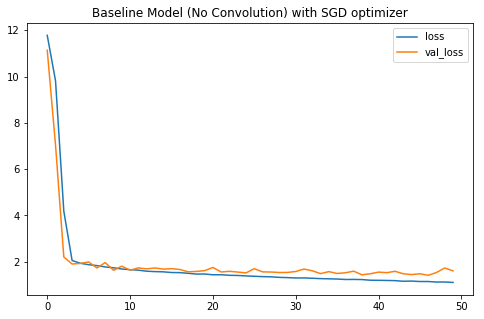

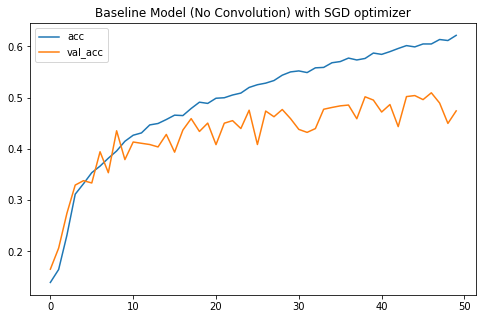

In [9]:
plt.figure(figsize=(8,5));
plt.plot(SGD_res.history['loss']);
plt.plot(SGD_res.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Baseline Model (No Convolution) with SGD optimizer');

plt.figure(figsize=(8,5));
plt.plot(SGD_res.history['acc']);
plt.plot(SGD_res.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Baseline Model (No Convolution) with SGD optimizer');

In [10]:
num_pixels = 32 * 32 * 3
num_classes = 10

optimizer=Adadelta(lr=1.0)

# build the model
model_AD = baseline_model()

# Fit the model
csv_logger = CSVLogger('model_AD.log')

start = time.time()
AD_res = model_AD.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=1000, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
model_AD.save('AD_res.h5')

# Final evaluation of the model
scores = model_AD.evaluate(x_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Baseline Accuracy, Adadelta optimizer: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 43us/step - loss: 11.6966 - acc: 0.1419 - val_loss: 12.7335 - val_acc: 0.1139
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 10.1652 - acc: 0.1603 - val_loss: 8.0363 - val_acc: 0.2036
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 5.0622 - acc: 0.2188 - val_loss: 2.2954 - val_acc: 0.2157
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0675 - acc: 0.3067 - val_loss: 1.8700 - val_acc: 0.3400
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9446 - acc: 0.3360 - val_loss: 1.8360 - val_acc: 0.3500
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8770 - acc: 0.3535 - val_loss: 1.8558 - val_acc: 0.3445
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8347 - acc: 0.3662 - val_loss: 1.8067 - val_

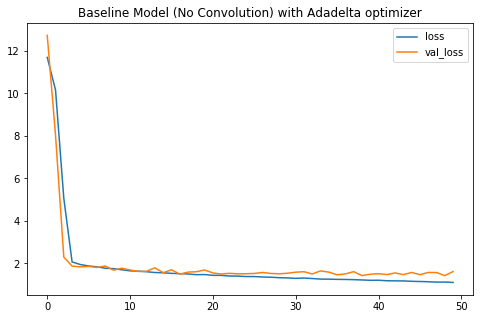

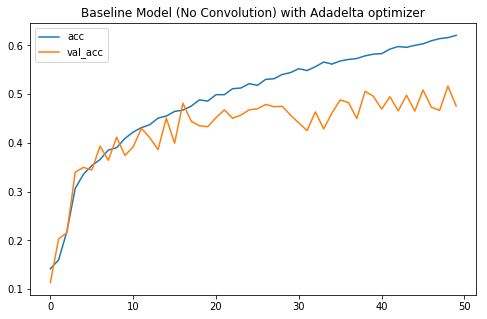

In [11]:
plt.figure(figsize=(8,5));
plt.plot(AD_res.history['loss']);
plt.plot(AD_res.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Baseline Model (No Convolution) with Adadelta optimizer');

plt.figure(figsize=(8,5));
plt.plot(AD_res.history['acc']);
plt.plot(AD_res.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Baseline Model (No Convolution) with Adadelta optimizer');

In [12]:
num_pixels = 32 * 32 * 3
num_classes = 10

learning_rate=.0001
optimizer=Adam(lr=learning_rate)

# build the model
model_Adam = baseline_model()

# Fit the model
csv_logger = CSVLogger('model_Adam.log')

start = time.time()
Adam_res = model_Adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=1000, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
model_Adam.save('Adam_res.h5')

# Final evaluation of the model
scores = model_Adam.evaluate(x_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Baseline Accuracy, Adam optimizer: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 43us/step - loss: 11.6940 - acc: 0.1421 - val_loss: 12.7466 - val_acc: 0.1155
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 10.2389 - acc: 0.1585 - val_loss: 7.4235 - val_acc: 0.1716
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 4.9673 - acc: 0.2201 - val_loss: 2.2371 - val_acc: 0.2436
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0730 - acc: 0.3082 - val_loss: 1.8389 - val_acc: 0.3587
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9693 - acc: 0.3282 - val_loss: 1.9716 - val_acc: 0.3574
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8863 - acc: 0.3521 - val_loss: 1.7674 - val_acc: 0.3766
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8310 - acc: 0.3664 - val_loss: 1.8642 - val_

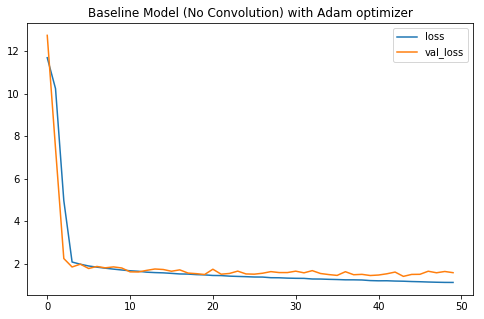

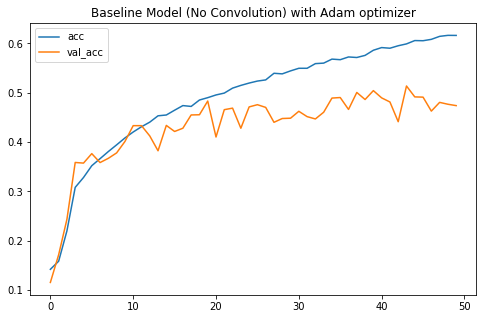

In [ ]:
plt.figure(figsize=(8,5));
plt.plot(Adam_res.history['loss']);
plt.plot(Adam_res.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Baseline Model (No Convolution) with Adam optimizer');

plt.figure(figsize=(8,5));
plt.plot(Adam_res.history['acc']);
plt.plot(Adam_res.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Baseline Model (No Convolution) with Adam optimizer');

##### GridSearch for batch size and epochs

In [8]:
num_pixels = 32 * 32 * 3
num_classes = 10

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=baseline_model, verbose=1)

# define the grid search parameters
batch_size = [64, 128]
epochs = [100]
learning_rate = .0001 #[.0001, .001, .01, .1, 1]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
start = time.time()
grid_result = grid.fit(x_train, y_train)
end = time.time()

# summarize results
print('Training time = %.2f minutes' % ((end-start)/60))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
33333/33333 [==============================] - 10s 301us/step - loss: 4.1540 - acc: 0.2489
Epoch 2/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.8015 - acc: 0.3603
Epoch 3/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.6771 - acc: 0.4032
Epoch 4/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.6028 - acc: 0.4269
Epoch 5/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.5417 - acc: 0.4529
Epoch 6/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.4970 - acc: 0.4713
Epoch 7/100
33333/33333 [==============================] - 9s 276us/step - loss: 1.4538 - acc: 0.4856
Epoch 8/100
33333/33333 [==============================] - 9s 281us/step - loss: 1.4133 - acc: 0.5008
Epoch 9/100
33333/33333 [==============================] - 9s 274us/step - loss: 1.3797 - acc: 0.5153
Epoch 10/100
33333/33333 [==============================] - 9s 275us/step - loss:

33333/33333 [==============================] - 9s 276us/step - loss: 0.3803 - acc: 0.8705
Epoch 59/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3677 - acc: 0.8760
Epoch 60/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3553 - acc: 0.8804
Epoch 61/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3472 - acc: 0.8821
Epoch 62/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3421 - acc: 0.8831
Epoch 63/100
33333/33333 [==============================] - 9s 276us/step - loss: 0.3231 - acc: 0.8921
Epoch 64/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3187 - acc: 0.8923
Epoch 65/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3120 - acc: 0.8954
Epoch 66/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.3021 - acc: 0.8992
Epoch 67/100
33333/33333 [==============================] - 9s 275us/step - loss: 0.30

33333/33333 [==============================] - 5s 146us/step - loss: 1.2757 - acc: 0.5510
Epoch 15/100
33333/33333 [==============================] - 5s 145us/step - loss: 1.2468 - acc: 0.5622
Epoch 16/100
33333/33333 [==============================] - 5s 145us/step - loss: 1.2134 - acc: 0.5750
Epoch 17/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.1881 - acc: 0.5823
Epoch 18/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.1547 - acc: 0.5949
Epoch 19/100
33333/33333 [==============================] - 5s 145us/step - loss: 1.1334 - acc: 0.6030
Epoch 20/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.1055 - acc: 0.6128
Epoch 21/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.0811 - acc: 0.6236
Epoch 22/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.0526 - acc: 0.6330
Epoch 23/100
33333/33333 [==============================] - 5s 146us/step - loss: 1.03

33333/33333 [==============================] - 5s 147us/step - loss: 0.3219 - acc: 0.8971
Epoch 72/100
33333/33333 [==============================] - 5s 147us/step - loss: 0.3196 - acc: 0.8973
Epoch 73/100
33333/33333 [==============================] - 5s 147us/step - loss: 0.3123 - acc: 0.8982
Epoch 74/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.3150 - acc: 0.8996
Epoch 75/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2985 - acc: 0.9032
Epoch 76/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2984 - acc: 0.9049
Epoch 77/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2866 - acc: 0.9079
Epoch 78/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2806 - acc: 0.9129
Epoch 79/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.2722 - acc: 0.9159
Epoch 80/100
33333/33333 [==============================] - 5s 146us/step - loss: 0.26

50000/50000 [==============================] - 14s 275us/step - loss: 0.8695 - acc: 0.6976
Epoch 28/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.8520 - acc: 0.7023
Epoch 29/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.8282 - acc: 0.7128
Epoch 30/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.8055 - acc: 0.7200
Epoch 31/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.7854 - acc: 0.7239
Epoch 32/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.7649 - acc: 0.7328
Epoch 33/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.7541 - acc: 0.7358
Epoch 34/100
50000/50000 [==============================] - 14s 275us/step - loss: 0.7297 - acc: 0.7467
Epoch 35/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.7119 - acc: 0.7532
Epoch 36/100
50000/50000 [==============================] - 14s 276us/step - 

#### Create Convolutional Neural Network

Basic convolutional model (6 hidden layers), three versions (same optimizer, different learning rates).

In [9]:
def convolution_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    np.random.seed(911)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
    model.summary()
    return model

In [10]:
# build the model
conv_001 = convolution_model()
learning_rate=.001

# Fit the model
csv_logger = CSVLogger('conv_001.log')

start = time.time()
results_conv_001 = conv_001.fit(X_train, y_train, 
                             validation_data = (X_test, y_test), 
                             epochs=100, batch_size=128, verbose=1,
                             callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
conv_001.save('model_conv_001.h5')

# Final evaluation of the model
scores = conv_001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Basic Convolutional Model Accuracy for lr=.001 is: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               204928    
__________

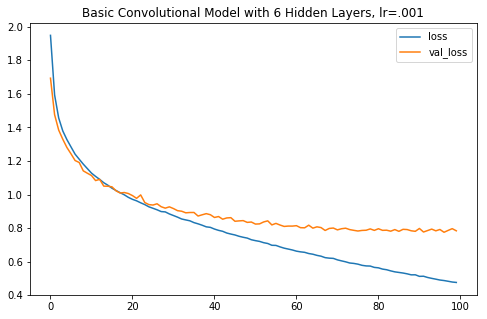

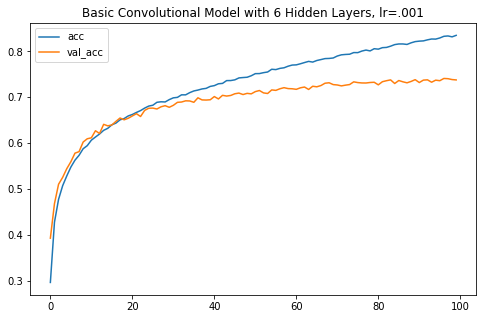

In [11]:
plt.figure(figsize=(8,5));
plt.plot(results_conv_001.history['loss']);
plt.plot(results_conv_001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.001');

plt.figure(figsize=(8,5));
plt.plot(results_conv_001.history['acc']);
plt.plot(results_conv_001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.001');

In [12]:
# build the model
conv_0001 = convolution_model()
learning_rate=.0001

# Fit the model
csv_logger = CSVLogger('conv_0001.log')

start = time.time()
results_conv_0001 = conv_0001.fit(X_train, y_train, 
                             validation_data = (X_test, y_test), 
                             epochs=100, batch_size=128, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
conv_0001.save('model_conv_0001.h5')

# Final evaluation of the model
scores = conv_0001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Basic Convolutional Model Accuracy for lr=.0001 is: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               204928    
__________

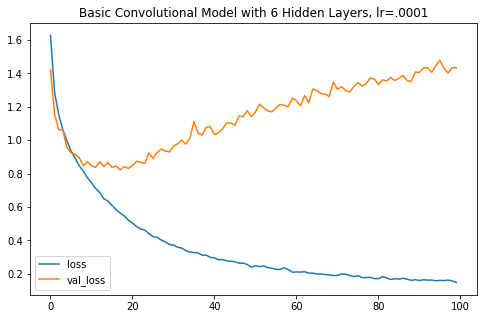

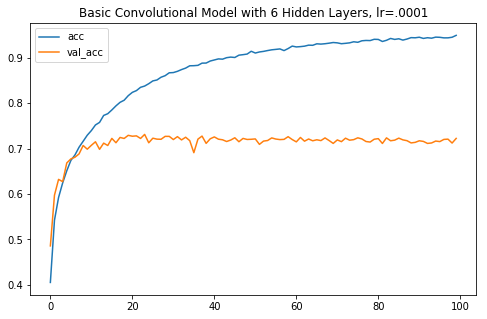

In [13]:
plt.figure(figsize=(8,5));
plt.plot(results_conv_0001.history['loss']);
plt.plot(results_conv_0001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.0001');

plt.figure(figsize=(8,5));
plt.plot(results_conv_0001.history['acc']);
plt.plot(results_conv_0001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.0001');

In [14]:
# build the model
conv_00001 = convolution_model()
learning_rate=.00001

# Fit the model
csv_logger = CSVLogger('conv_00001.log')

start = time.time()
results_conv_00001 = conv_00001.fit(X_train, y_train, 
                             validation_data = (X_test, y_test), 
                             epochs=100, batch_size=128, verbose=1,
                       callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
conv_00001.save('model_conv_00001.h5')

# Final evaluation of the model
scores = conv_00001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print("Basic Convolutional Model Accuracy for lr=.00001 is: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               204928    
__________

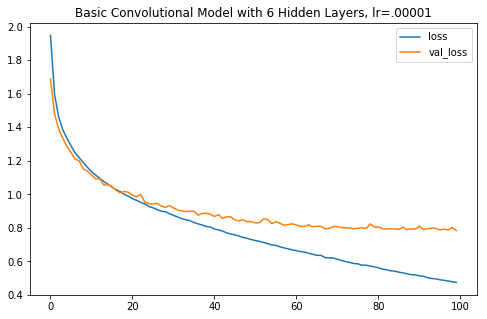

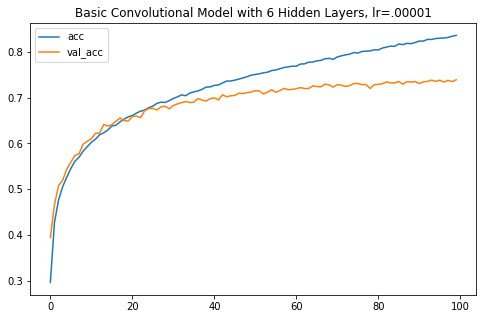

In [15]:
plt.figure(figsize=(8,5));
plt.plot(results_conv_00001.history['loss']);
plt.plot(results_conv_00001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.00001');

plt.figure(figsize=(8,5));
plt.plot(results_conv_00001.history['acc']);
plt.plot(results_conv_00001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Basic Convolutional Model with 6 Hidden Layers, lr=.00001');

The convolutional model defined below was determined through trial and error. The number of hidden layers is consistent, but the number of filters, kernel size, dense layer sizes, and learning rates will be adjusted to show the impact of changing these hyperparameters.

In [6]:
# Define the model
def cnn(filter1, filter2, filter3, dense1, dense2, kernel_size, learning_rate):
    model = Sequential()
    model.add(Conv2D(filter1, kernel_size=kernel_size, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(filter1, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filter2, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(Conv2D(filter2, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filter3, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(Conv2D(filter3, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(dense1, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(dense2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In all the trained models below, 'i' is the number of filters in the first two layers (i.e. 'filter1'), and all the other filters and dense layers are multiples of 'i'. This has the effect of increasing the number of neurons in the hidden layers dramatically, with the net effect of improving the accuracy of the model. 

In addition, the learning rate is adjusted to different levels within each combination of 'i' filters. Batch size (128) and optimizer (Adam) will be held constant. Epochs will be set to 100, and set to stop early using Keras callback EarlyStopping. Whichever model yields the best accuracy will be run for a full 200 epochs.

Lastly, the learning rate of .01 was determined previously to return accuracy of 10% for this model, so it will not be used. Instead, learning rates of .001, .0001, and .00001 will be used for training.

##### Set 1

In [17]:
i=32
cnn32_001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=32, lr=.001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn32_001.log')

start = time.time()
model32_001 = cnn32_001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data = (X_test, y_test), verbose=1, 
                            callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn32_001.save('model32_001.h5')

# compute test accuracy
scores = cnn32_001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        8256      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.001')

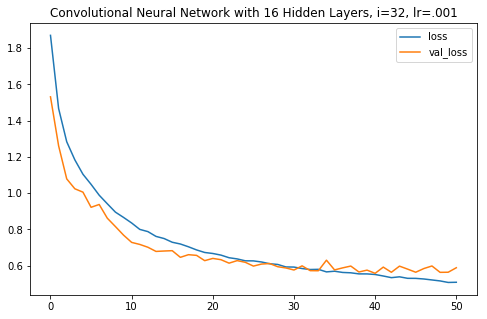

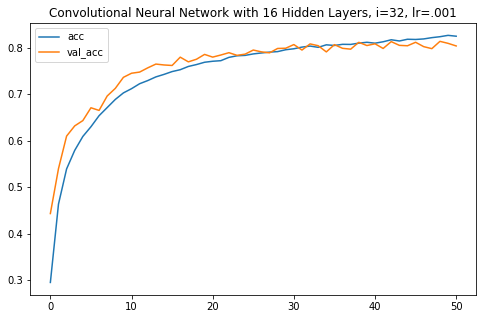

In [48]:
plt.figure(figsize=(8,5));
plt.plot(model32_001.history['loss']);
plt.plot(model32_001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.001');

plt.figure(figsize=(8,5));
plt.plot(model32_001.history['acc']);
plt.plot(model32_001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.001');

plt.savefig('32001l.png')
plt.savefig('32001a.png')

In [19]:
i=32
cnn32_0001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=32, lr=.0001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn32_0001.log')

start = time.time()
model32_0001 = cnn32_0001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                              validation_data = (X_test, y_test), verbose=1, 
                              callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn32_0001.save('model32_0001.h5')

# compute test accuracy
scores = cnn32_0001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        8256      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
__________

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.0001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.0001')

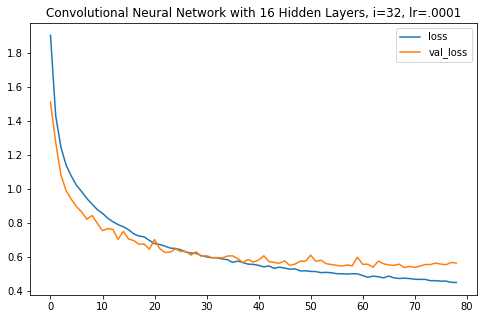

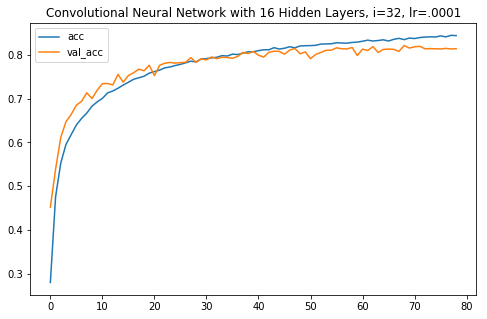

In [47]:
plt.figure(figsize=(8,5));
plt.plot(model32_0001.history['loss']);
plt.plot(model32_0001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.0001');

plt.figure(figsize=(8,5));
plt.plot(model32_0001.history['acc']);
plt.plot(model32_0001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.0001');

plt.savefig('320001l.png')
plt.savefig('320001a.png')

In [21]:
i=32
cnn32_00001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=32, lr=.00001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn32_00001.log')

start = time.time()
model32_00001 = cnn32_00001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                validation_data = (X_test, y_test), verbose=1, 
                                callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn32_00001.save('model32_00001.h5')

# compute test accuracy
scores = cnn32_00001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 64)        8256      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
__________

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.00001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.00001')

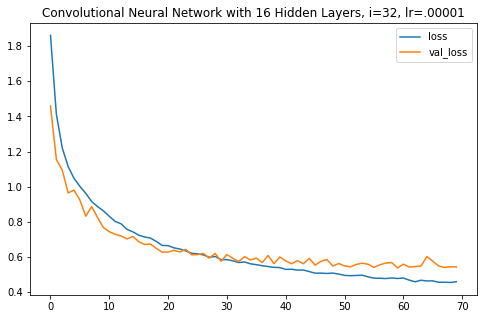

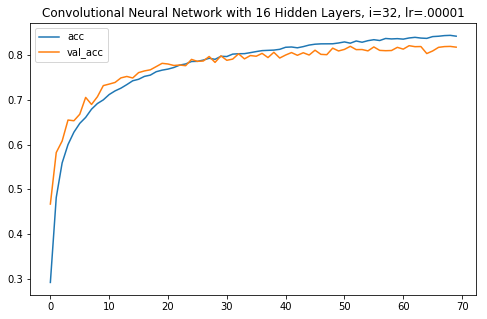

In [46]:
plt.figure(figsize=(8,5));
plt.plot(model32_00001.history['loss']);
plt.plot(model32_00001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.00001');

plt.figure(figsize=(8,5));
plt.plot(model32_00001.history['acc']);
plt.plot(model32_00001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=32, lr=.00001');

plt.savefig('3200001l.png')
plt.savefig('3200001a.png')

-----

##### Set 2

In [23]:
i=48
cnn48_001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=48, lr=.001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn48_001.log')

start = time.time()
model48_001 = cnn48_001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data = (X_test, y_test), verbose=1, 
                            callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn48_001.save('model48_001.h5')

# compute test accuracy
scores = cnn48_001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 48)        624       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 31, 31, 48)        9264      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 96)        18528     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 96)        36960     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 96)          0         
__________

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.001')

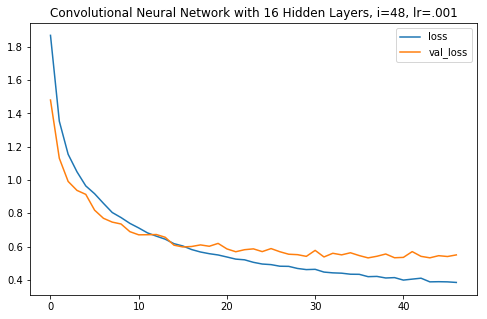

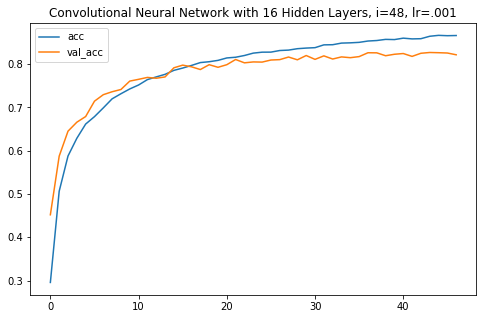

In [43]:
plt.figure(figsize=(8,5));
plt.plot(model48_001.history['loss']);
plt.plot(model48_001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.001');

plt.figure(figsize=(8,5));
plt.plot(model48_001.history['acc']);
plt.plot(model48_001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.001');

plt.savefig('48001l.png')
plt.savefig('48001a.png')

In [25]:
i=48
cnn48_0001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=48, lr=.0001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn48_0001.log')

start = time.time()
model48_0001 = cnn48_0001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                              validation_data = (X_test, y_test), verbose=1, 
                              callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn48_0001.save('model48_0001.h5')

# compute test accuracy
scores = cnn48_0001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 48)        624       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 31, 31, 48)        9264      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 96)        18528     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 96)        36960     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 96)          0         
__________

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001')

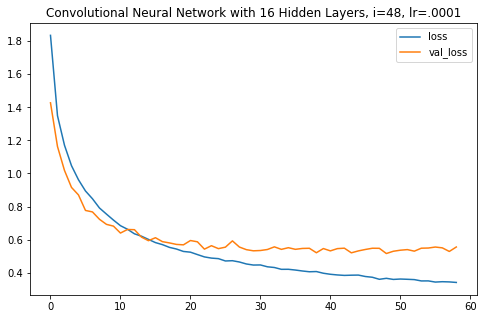

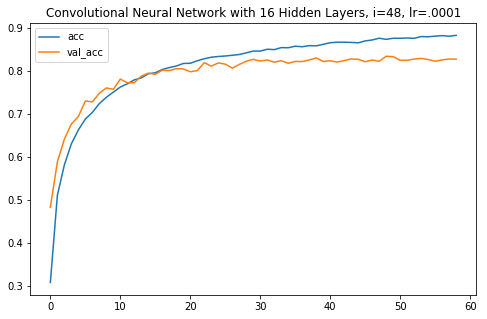

In [44]:
plt.figure(figsize=(8,5));
plt.plot(model48_0001.history['loss']);
plt.plot(model48_0001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001');

plt.figure(figsize=(8,5));
plt.plot(model48_0001.history['acc']);
plt.plot(model48_0001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001');

plt.savefig('480001l.png')
plt.savefig('480001a.png')

In [27]:
i=48
cnn48_00001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=48, lr=.00001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn48_00001.log')

start = time.time()
model48_00001 = cnn48_00001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                validation_data = (X_test, y_test), verbose=1, 
                                callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn48_00001.save('model48_00001.h5')

# compute test accuracy
scores = cnn48_00001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 48)        624       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 31, 31, 48)        9264      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 96)        18528     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 96)        36960     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 96)          0         
__________

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.00001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.00001')

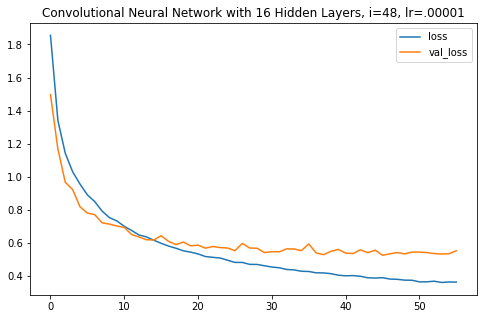

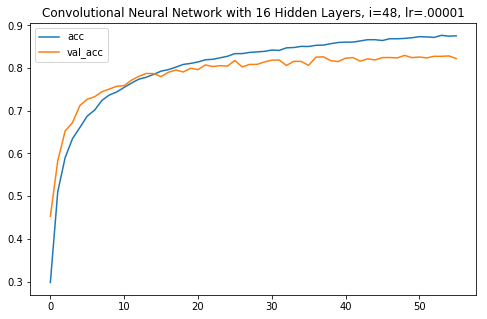

In [45]:
plt.figure(figsize=(8,5));
plt.plot(model48_00001.history['loss']);
plt.plot(model48_00001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.00001');

plt.figure(figsize=(8,5));
plt.plot(model48_00001.history['acc']);
plt.plot(model48_00001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.00001');

plt.savefig('4800001l.png')
plt.savefig('4800001a.png')

---

##### Set 3

In [29]:
i=64
cnn64_001 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=64, lr=.001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn64_001.log')

start = time.time()
model64_001 = cnn64_001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data = (X_test, y_test), verbose=1, 
                            callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn64_001.save('model64_001.h5')

# compute test accuracy
scores = cnn64_001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 31, 31, 64)        16448     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 15, 15, 128)       32896     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 128)         0         
__________

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001')

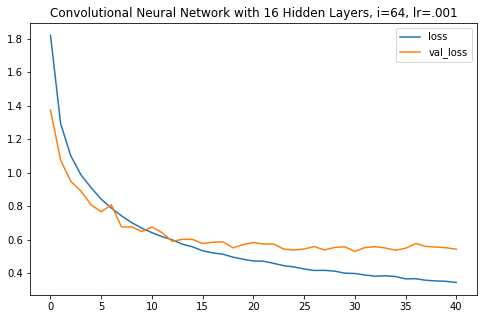

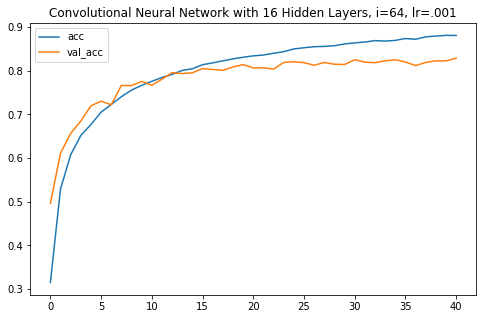

In [39]:
plt.figure(figsize=(8,5));
plt.plot(model64_001.history['loss']);
plt.plot(model64_001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001');

plt.figure(figsize=(8,5));
plt.plot(model64_001.history['acc']);
plt.plot(model64_001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001');

plt.savefig('64001l.png')
plt.savefig('64001a.png')

In [12]:
i=64
cnn64_0001 = cnn(i,2*i,4*i,12*i,6*i,2,.0001) # i=64, lr=.0001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn64_0001.log')

start = time.time()
model64_0001 = cnn64_0001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                              validation_data = (X_test, y_test), verbose=1, 
                              callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn64_0001.save('model64_0001.h5')

# compute test accuracy
scores = cnn64_0001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 31, 31, 64)        16448     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)       32896     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 128)         0         
__________

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001')

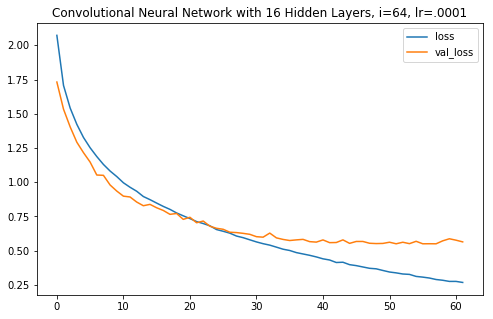

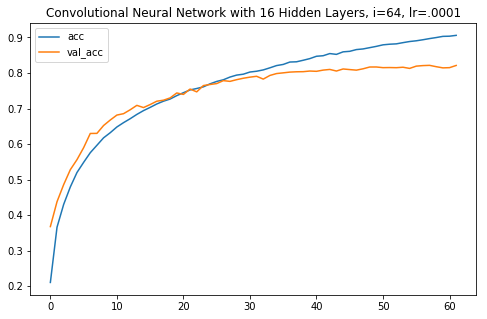

In [13]:
plt.figure(figsize=(8,5));
plt.plot(model64_0001.history['loss']);
plt.plot(model64_0001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001');

plt.figure(figsize=(8,5));
plt.plot(model64_0001.history['acc']);
plt.plot(model64_0001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001');

plt.savefig('640001l.png')
plt.savefig('640001a.png')

In [14]:
i=64
cnn64_00001 = cnn(i,2*i,4*i,12*i,6*i,2,.00001) # i=64, lr=.00001
batch_size = 128
epochs = 100

# Train the model
csv_logger = CSVLogger('cnn64_00001.log')

start = time.time()
model64_00001 = cnn64_00001.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                validation_data = (X_test, y_test), verbose=1, 
                                callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn64_00001.save('model64_00001.h5')

# compute test accuracy
scores = cnn64_00001.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 31, 31, 64)        16448     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)       32896     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 128)         0         
__________

50000/50000 [==============================] - 29s 587us/step - loss: 1.0005 - acc: 0.6469 - val_loss: 0.9491 - val_acc: 0.6614
Epoch 98/100
50000/50000 [==============================] - 29s 588us/step - loss: 0.9933 - acc: 0.6480 - val_loss: 0.9278 - val_acc: 0.6701
Epoch 99/100
50000/50000 [==============================] - 29s 587us/step - loss: 0.9888 - acc: 0.6528 - val_loss: 0.9224 - val_acc: 0.6702
Epoch 100/100
10000/10000 [==============================] - 2s 211us/step
Model took 48.92 minutes to train
Accuracy on test data is: 67.35


Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001')

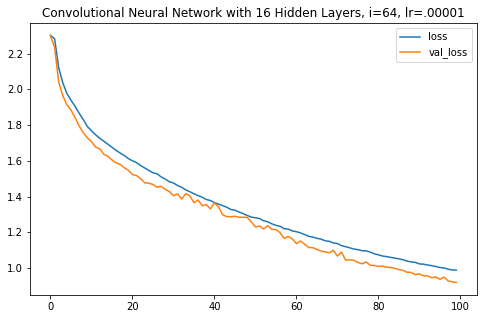

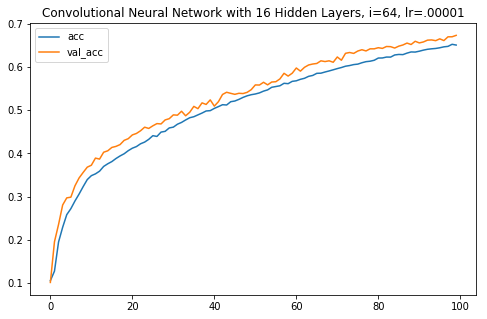

In [15]:
plt.figure(figsize=(8,5));
plt.plot(model64_00001.history['loss']);
plt.plot(model64_00001.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001');
plt.savefig('6400001l.png')

plt.figure(figsize=(8,5));
plt.plot(model64_00001.history['acc']);
plt.plot(model64_00001.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001');
plt.savefig('6400001a.png')

----

##### Set 4a

In [6]:
i=48
cnn48_0001_64 = cnn(i,2*i,4*i,12*i,6*i,2,.0001) # i=48, lr=.0001
batch_size = 64
epochs = 200

# Train the model
csv_logger = CSVLogger('cnn48_0001_64.log')

start = time.time()
model48_0001_64 = cnn48_0001_64.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data = (X_test, y_test), verbose=1, 
                            callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
cnn48_0001_64.save('model48_0001_64.h5')

# compute test accuracy
scores = cnn48_0001_64.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        624       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 48)        9264      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        18528     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 96)        36960     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 96)          0         
__________

50000/50000 [==============================] - 26s 528us/step - loss: 0.2205 - acc: 0.9213 - val_loss: 0.5593 - val_acc: 0.8318
Epoch 98/200
50000/50000 [==============================] - 26s 528us/step - loss: 0.2205 - acc: 0.9215 - val_loss: 0.5631 - val_acc: 0.8281
Epoch 99/200
50000/50000 [==============================] - 26s 527us/step - loss: 0.2175 - acc: 0.9225 - val_loss: 0.5539 - val_acc: 0.8325
Epoch 100/200
50000/50000 [==============================] - 26s 527us/step - loss: 0.2135 - acc: 0.9248 - val_loss: 0.5567 - val_acc: 0.8321
Epoch 101/200
50000/50000 [==============================] - 26s 529us/step - loss: 0.2117 - acc: 0.9254 - val_loss: 0.5633 - val_acc: 0.8328
Epoch 102/200
50000/50000 [==============================] - 27s 533us/step - loss: 0.2109 - acc: 0.9265 - val_loss: 0.5694 - val_acc: 0.8299
Epoch 103/200
50000/50000 [==============================] - 27s 531us/step - loss: 0.2093 - acc: 0.9271 - val_loss: 0.5644 - val_acc: 0.8307
Epoch 104/200
50000/50

Epoch 155/200
50000/50000 [==============================] - 26s 526us/step - loss: 0.1334 - acc: 0.9540 - val_loss: 0.6138 - val_acc: 0.8387
Epoch 156/200
50000/50000 [==============================] - 26s 527us/step - loss: 0.1356 - acc: 0.9530 - val_loss: 0.6169 - val_acc: 0.8369
Epoch 157/200
50000/50000 [==============================] - 26s 526us/step - loss: 0.1357 - acc: 0.9522 - val_loss: 0.6183 - val_acc: 0.8355
Epoch 158/200
50000/50000 [==============================] - 26s 525us/step - loss: 0.1354 - acc: 0.9534 - val_loss: 0.5914 - val_acc: 0.8373
Epoch 159/200
50000/50000 [==============================] - 26s 525us/step - loss: 0.1316 - acc: 0.9543 - val_loss: 0.6056 - val_acc: 0.8361
Epoch 160/200
50000/50000 [==============================] - 26s 527us/step - loss: 0.1326 - acc: 0.9546 - val_loss: 0.5980 - val_acc: 0.8373
Epoch 161/200
50000/50000 [==============================] - 26s 527us/step - loss: 0.1271 - acc: 0.9550 - val_loss: 0.6070 - val_acc: 0.8409
Epoch 

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001')

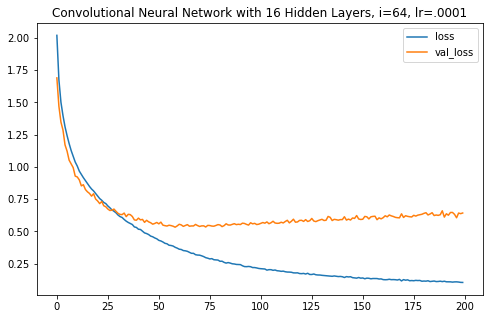

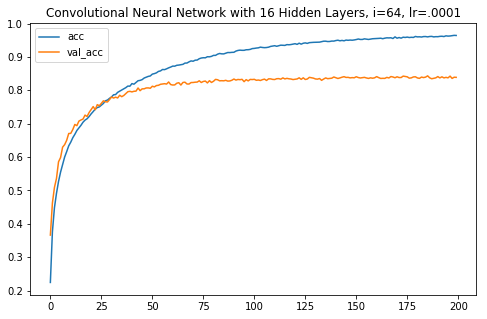

In [7]:
plt.figure(figsize=(8,5));
plt.plot(model48_0001_64.history['loss']);
plt.plot(model48_0001_64.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001, bs=64');
plt.savefig('48000164l.png')

plt.figure(figsize=(8,5));
plt.plot(model48_0001_64.history['acc']);
plt.plot(model48_0001_64.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001, bs=64');
plt.savefig('48000164a.png')

---

##### Set 5

In [8]:
i=64
cnn64_001_64 = cnn(i,2*i,4*i,12*i,6*i,2,.001) # i=64, lr=.001
batch_size = 64
epochs = 200

# Train the model
csv_logger = CSVLogger('cnn64_001_64.log')

start = time.time()
model64_001_64 = cnn64_001_64.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data = (X_test, y_test), verbose=1, 
                            callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
cnn64_001_64.save('model64_001_64.h5')

# compute test accuracy
scores = cnn64_001_64.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 64)        16448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       32896     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
__________

50000/50000 [==============================] - 32s 649us/step - loss: 0.3885 - acc: 0.8740 - val_loss: 0.5736 - val_acc: 0.8193
Epoch 98/200
50000/50000 [==============================] - 32s 649us/step - loss: 0.3767 - acc: 0.8786 - val_loss: 0.5622 - val_acc: 0.8223
Epoch 99/200
50000/50000 [==============================] - 32s 648us/step - loss: 0.3782 - acc: 0.8771 - val_loss: 0.5913 - val_acc: 0.8152
Epoch 100/200
50000/50000 [==============================] - 32s 648us/step - loss: 0.3819 - acc: 0.8745 - val_loss: 0.5812 - val_acc: 0.8117
Epoch 101/200
50000/50000 [==============================] - 32s 650us/step - loss: 0.3852 - acc: 0.8753 - val_loss: 0.5839 - val_acc: 0.8112
Epoch 102/200
50000/50000 [==============================] - 32s 649us/step - loss: 0.3786 - acc: 0.8769 - val_loss: 0.5805 - val_acc: 0.8199
Epoch 103/200
50000/50000 [==============================] - 32s 647us/step - loss: 0.3699 - acc: 0.8782 - val_loss: 0.5554 - val_acc: 0.8269
Epoch 104/200
50000/50

Epoch 155/200
50000/50000 [==============================] - 32s 649us/step - loss: 0.3585 - acc: 0.8875 - val_loss: 0.6143 - val_acc: 0.8157
Epoch 156/200
50000/50000 [==============================] - 32s 649us/step - loss: 0.3615 - acc: 0.8867 - val_loss: 0.6039 - val_acc: 0.8208
Epoch 157/200
50000/50000 [==============================] - 32s 648us/step - loss: 0.3569 - acc: 0.8874 - val_loss: 0.5897 - val_acc: 0.8255
Epoch 158/200
50000/50000 [==============================] - 32s 649us/step - loss: 0.3658 - acc: 0.8862 - val_loss: 0.5832 - val_acc: 0.8262
Epoch 159/200
50000/50000 [==============================] - 33s 650us/step - loss: 0.3571 - acc: 0.8885 - val_loss: 0.6007 - val_acc: 0.8259
Epoch 160/200
50000/50000 [==============================] - 32s 648us/step - loss: 0.3544 - acc: 0.8880 - val_loss: 0.6164 - val_acc: 0.8215
Epoch 161/200
50000/50000 [==============================] - 32s 649us/step - loss: 0.3515 - acc: 0.8912 - val_loss: 0.5880 - val_acc: 0.8238
Epoch 

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001')

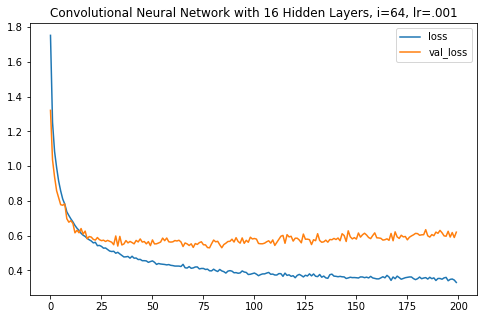

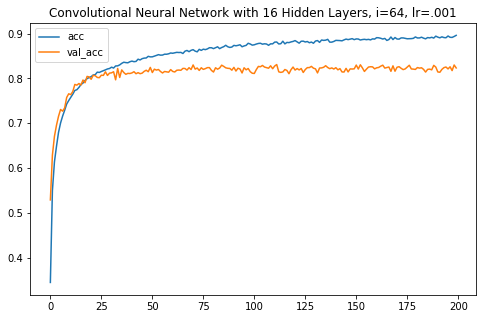

In [9]:
plt.figure(figsize=(8,5));
plt.plot(model64_001_64.history['loss']);
plt.plot(model64_001_64.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001, bs=64');
plt.savefig('6400164l.png')

plt.figure(figsize=(8,5));
plt.plot(model64_001_64.history['acc']);
plt.plot(model64_001_64.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.001, bs=64');
plt.savefig('6400164a.png')

---

---

##### Set 6

In [18]:
i=64
cnn64_00001_500 = cnn(i,2*i,4*i,12*i,6*i,2,.00001) # i=64, lr=.00001
batch_size = 128
epochs = 500

# Train the model
csv_logger = CSVLogger('cnn64_00001_500.log')

start = time.time()
model64_00001_500 = cnn64_00001_500.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                validation_data = (X_test, y_test), verbose=1, 
                                callbacks=[csv_logger, EarlyStopping(min_delta=0.0005, patience=10)])
end = time.time()

# save model to HDF5 file
cnn64_00001_500.save('model64_00001_500.h5')

# compute test accuracy
scores = cnn64_00001_500.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 31, 31, 64)        16448     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 128)       32896     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 128)         0         
__________

50000/50000 [==============================] - 29s 588us/step - loss: 1.0396 - acc: 0.6326 - val_loss: 0.9615 - val_acc: 0.6634
Epoch 98/500
50000/50000 [==============================] - 29s 587us/step - loss: 1.0300 - acc: 0.6347 - val_loss: 0.9623 - val_acc: 0.6633
Epoch 99/500
50000/50000 [==============================] - 29s 586us/step - loss: 1.0259 - acc: 0.6362 - val_loss: 0.9488 - val_acc: 0.6666
Epoch 100/500
50000/50000 [==============================] - 29s 586us/step - loss: 1.0223 - acc: 0.6397 - val_loss: 0.9450 - val_acc: 0.6685
Epoch 101/500
50000/50000 [==============================] - 29s 588us/step - loss: 1.0154 - acc: 0.6427 - val_loss: 0.9486 - val_acc: 0.6668
Epoch 102/500
50000/50000 [==============================] - 29s 586us/step - loss: 1.0130 - acc: 0.6422 - val_loss: 0.9465 - val_acc: 0.6700
Epoch 103/500
50000/50000 [==============================] - 29s 585us/step - loss: 1.0095 - acc: 0.6409 - val_loss: 0.9329 - val_acc: 0.6729
Epoch 104/500
50000/50

Epoch 155/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.8310 - acc: 0.7079 - val_loss: 0.7991 - val_acc: 0.7197
Epoch 156/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.8271 - acc: 0.7083 - val_loss: 0.7910 - val_acc: 0.7259
Epoch 157/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.8249 - acc: 0.7113 - val_loss: 0.7761 - val_acc: 0.7292
Epoch 158/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.8229 - acc: 0.7111 - val_loss: 0.7857 - val_acc: 0.7250
Epoch 159/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.8198 - acc: 0.7128 - val_loss: 0.7946 - val_acc: 0.7224
Epoch 160/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.8184 - acc: 0.7125 - val_loss: 0.7768 - val_acc: 0.7290
Epoch 161/500
50000/50000 [==============================] - 29s 586us/step - loss: 0.8138 - acc: 0.7151 - val_loss: 0.7791 - val_acc: 0.7267
Epoch 

Epoch 213/500
50000/50000 [==============================] - 29s 585us/step - loss: 0.6876 - acc: 0.7581 - val_loss: 0.6917 - val_acc: 0.7579
Epoch 214/500
50000/50000 [==============================] - 29s 585us/step - loss: 0.6889 - acc: 0.7589 - val_loss: 0.6899 - val_acc: 0.7602
Epoch 215/500
50000/50000 [==============================] - 29s 585us/step - loss: 0.6838 - acc: 0.7613 - val_loss: 0.6934 - val_acc: 0.7585
Epoch 216/500
50000/50000 [==============================] - 29s 586us/step - loss: 0.6844 - acc: 0.7610 - val_loss: 0.6902 - val_acc: 0.7593
Epoch 217/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.6800 - acc: 0.7624 - val_loss: 0.6834 - val_acc: 0.7628
Epoch 218/500
50000/50000 [==============================] - 29s 586us/step - loss: 0.6784 - acc: 0.7633 - val_loss: 0.6845 - val_acc: 0.7606
Epoch 219/500
50000/50000 [==============================] - 29s 586us/step - loss: 0.6770 - acc: 0.7642 - val_loss: 0.6788 - val_acc: 0.7648
Epoch 

Epoch 271/500
50000/50000 [==============================] - 29s 585us/step - loss: 0.5758 - acc: 0.7984 - val_loss: 0.6276 - val_acc: 0.7839
Epoch 272/500
50000/50000 [==============================] - 29s 586us/step - loss: 0.5740 - acc: 0.7983 - val_loss: 0.6213 - val_acc: 0.7836
Epoch 273/500
50000/50000 [==============================] - 29s 586us/step - loss: 0.5743 - acc: 0.8000 - val_loss: 0.6273 - val_acc: 0.7848
Epoch 274/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.5732 - acc: 0.7988 - val_loss: 0.6238 - val_acc: 0.7856
Epoch 275/500
50000/50000 [==============================] - 29s 586us/step - loss: 0.5717 - acc: 0.8003 - val_loss: 0.6220 - val_acc: 0.7852
Epoch 276/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.5691 - acc: 0.8017 - val_loss: 0.6237 - val_acc: 0.7857
Epoch 277/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.5650 - acc: 0.8024 - val_loss: 0.6234 - val_acc: 0.7846
Epoch 

Epoch 329/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.4845 - acc: 0.8304 - val_loss: 0.5893 - val_acc: 0.7979
Epoch 330/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.4791 - acc: 0.8323 - val_loss: 0.5872 - val_acc: 0.7995
Epoch 331/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.4798 - acc: 0.8318 - val_loss: 0.5876 - val_acc: 0.7997
Epoch 332/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.4833 - acc: 0.8317 - val_loss: 0.5868 - val_acc: 0.8014
Epoch 333/500
50000/50000 [==============================] - 29s 586us/step - loss: 0.4772 - acc: 0.8311 - val_loss: 0.5989 - val_acc: 0.7991
Epoch 334/500
50000/50000 [==============================] - 29s 586us/step - loss: 0.4784 - acc: 0.8327 - val_loss: 0.5985 - val_acc: 0.7953
Epoch 335/500
50000/50000 [==============================] - 29s 587us/step - loss: 0.4741 - acc: 0.8325 - val_loss: 0.5923 - val_acc: 0.7988
Epoch 

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001')

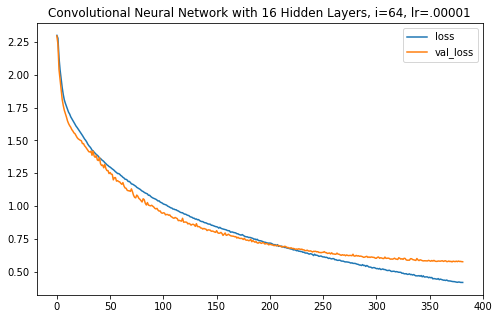

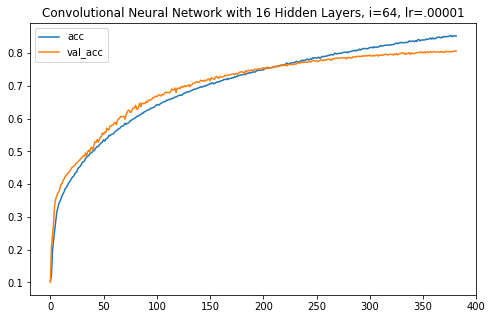

In [19]:
plt.figure(figsize=(8,5));
plt.plot(model64_00001_500.history['loss']);
plt.plot(model64_00001_500.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001');
plt.savefig('6400001_500l.png')

plt.figure(figsize=(8,5));
plt.plot(model64_00001_500.history['acc']);
plt.plot(model64_00001_500.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.00001');
plt.savefig('6400001_500a.png')

---

##### Set 7

In [ ]:
i=64
cnn64_0001_500 = cnn(i,2*i,4*i,12*i,6*i,2,.0001) # i=64, lr=.0001
batch_size = 128
epochs = 500

# Train the model
csv_logger = CSVLogger('cnn64_0001_500.log')

start = time.time()
model64_0001_300 = cnn64_0001_500.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                validation_data = (X_test, y_test), verbose=1, 
                                callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
cnn64_0001_500.save('model64_0001_500.h5')

# compute test accuracy
scores = cnn64_0001_500.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001')

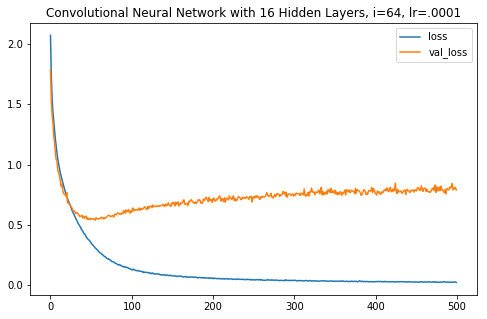

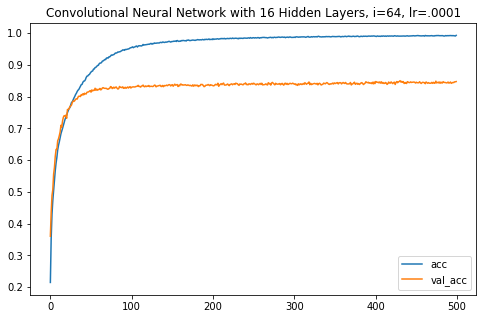

In [9]:
plt.figure(figsize=(8,5));
plt.plot(model64_0001_300.history['loss']);
plt.plot(model64_0001_300.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001');
plt.savefig('640001_500l.png')

plt.figure(figsize=(8,5));
plt.plot(model64_0001_300.history['acc']);
plt.plot(model64_0001_300.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001');
plt.savefig('640001_500a.png')

---

##### Set 8

In [10]:
# Define the model
def cnn_d(filter1, filter2, filter3, dense1, dense2, kernel_size, learning_rate):
    model = Sequential()
    model.add(Conv2D(filter1, kernel_size=kernel_size, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(filter1, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filter2, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(Conv2D(filter2, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filter3, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(Conv2D(filter3, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(dense1, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(dense2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(lr=learning_rate, decay = .000001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [11]:
i=64
cnn64_0001_200_d = cnn_d(i,2*i,4*i,12*i,6*i,2,.0001) # i=64, lr=.0001
batch_size = 128
epochs = 200

# Train the model
csv_logger = CSVLogger('cnn64_0001_200_d.log')

start = time.time()
model64_0001_200_d = cnn64_0001_200_d.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                                validation_data = (X_test, y_test), verbose=1, 
                                callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
cnn64_0001_200_d.save('model64_0001_200_d.h5')

# compute test accuracy
scores = cnn64_0001_200_d.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 64)        16448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       32896     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
__________

50000/50000 [==============================] - 29s 585us/step - loss: 0.1414 - acc: 0.9504 - val_loss: 0.6077 - val_acc: 0.8308
Epoch 98/200
50000/50000 [==============================] - 29s 585us/step - loss: 0.1373 - acc: 0.9522 - val_loss: 0.6246 - val_acc: 0.8344
Epoch 99/200
50000/50000 [==============================] - 29s 586us/step - loss: 0.1403 - acc: 0.9508 - val_loss: 0.6119 - val_acc: 0.8320
Epoch 100/200
50000/50000 [==============================] - 29s 586us/step - loss: 0.1323 - acc: 0.9534 - val_loss: 0.6237 - val_acc: 0.8269
Epoch 101/200
50000/50000 [==============================] - 29s 584us/step - loss: 0.1322 - acc: 0.9542 - val_loss: 0.6384 - val_acc: 0.8284
Epoch 102/200
50000/50000 [==============================] - 29s 587us/step - loss: 0.1271 - acc: 0.9554 - val_loss: 0.6168 - val_acc: 0.8306
Epoch 103/200
50000/50000 [==============================] - 29s 587us/step - loss: 0.1296 - acc: 0.9542 - val_loss: 0.6180 - val_acc: 0.8285
Epoch 104/200
50000/50

Epoch 155/200
50000/50000 [==============================] - 29s 583us/step - loss: 0.0742 - acc: 0.9750 - val_loss: 0.6825 - val_acc: 0.8344
Epoch 156/200
50000/50000 [==============================] - 29s 582us/step - loss: 0.0773 - acc: 0.9736 - val_loss: 0.6907 - val_acc: 0.8351
Epoch 157/200
50000/50000 [==============================] - 29s 583us/step - loss: 0.0764 - acc: 0.9737 - val_loss: 0.6725 - val_acc: 0.8344
Epoch 158/200
50000/50000 [==============================] - 29s 583us/step - loss: 0.0711 - acc: 0.9761 - val_loss: 0.7056 - val_acc: 0.8346
Epoch 159/200
50000/50000 [==============================] - 29s 583us/step - loss: 0.0775 - acc: 0.9740 - val_loss: 0.6860 - val_acc: 0.8351
Epoch 160/200
50000/50000 [==============================] - 29s 583us/step - loss: 0.0713 - acc: 0.9757 - val_loss: 0.6746 - val_acc: 0.8377
Epoch 161/200
50000/50000 [==============================] - 29s 582us/step - loss: 0.0733 - acc: 0.9756 - val_loss: 0.6800 - val_acc: 0.8379
Epoch 

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001 with decay')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001 with decay')

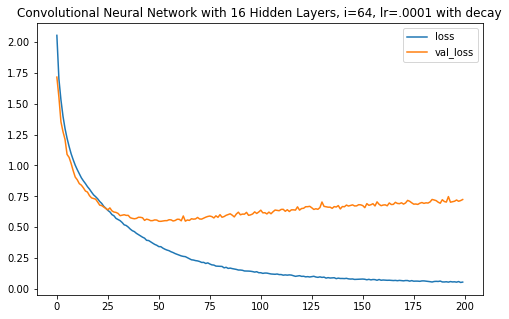

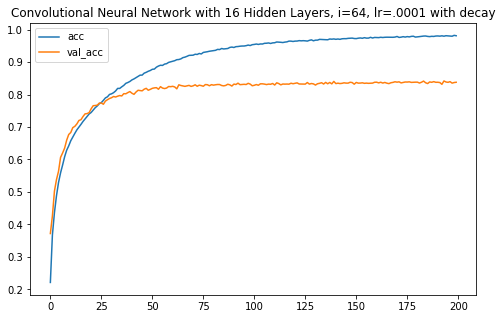

In [12]:
plt.figure(figsize=(8,5));
plt.plot(model64_0001_200_d.history['loss']);
plt.plot(model64_0001_200_d.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001 with decay');
plt.savefig('640001_200_dl.png')

plt.figure(figsize=(8,5));
plt.plot(model64_0001_200_d.history['acc']);
plt.plot(model64_0001_200_d.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=64, lr=.0001 with decay');
plt.savefig('640001_200_da.png')

---

##### Set 4b

In [13]:
i=48
cnn48_0001_64 = cnn(i,2*i,4*i,12*i,6*i,2,.0001) # i=48, lr=.0001
batch_size = 64
epochs = 300

# Train the model
csv_logger = CSVLogger('cnn48_0001_64.log')

start = time.time()
model48_0001_64 = cnn48_0001_64.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data = (X_test, y_test), verbose=1, 
                            callbacks=[csv_logger])
end = time.time()

# save model to HDF5 file
cnn48_0001_64.save('model48_0001_64.h5')

# compute test accuracy
scores = cnn48_0001_64.evaluate(X_test, y_test, verbose=1)
print ("Model took %0.2f minutes to train" % ((end - start)/60))
print ("Accuracy on test data is: %0.2f" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 48)        624       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 48)        9264      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 96)        18528     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 96)        36960     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 96)          0         
__________

50000/50000 [==============================] - 26s 521us/step - loss: 0.2042 - acc: 0.9277 - val_loss: 0.5773 - val_acc: 0.8297
Epoch 98/300
50000/50000 [==============================] - 26s 520us/step - loss: 0.2033 - acc: 0.9276 - val_loss: 0.5853 - val_acc: 0.8276
Epoch 99/300
50000/50000 [==============================] - 26s 520us/step - loss: 0.2045 - acc: 0.9296 - val_loss: 0.5625 - val_acc: 0.8340
Epoch 100/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.2008 - acc: 0.9291 - val_loss: 0.5810 - val_acc: 0.8313
Epoch 101/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.1943 - acc: 0.9328 - val_loss: 0.5672 - val_acc: 0.8362
Epoch 102/300
50000/50000 [==============================] - 26s 520us/step - loss: 0.1914 - acc: 0.9333 - val_loss: 0.5701 - val_acc: 0.8353
Epoch 103/300
50000/50000 [==============================] - 26s 521us/step - loss: 0.1925 - acc: 0.9318 - val_loss: 0.5755 - val_acc: 0.8350
Epoch 104/300
50000/50

Epoch 155/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.1273 - acc: 0.9562 - val_loss: 0.6196 - val_acc: 0.8380
Epoch 156/300
50000/50000 [==============================] - 26s 521us/step - loss: 0.1231 - acc: 0.9571 - val_loss: 0.6055 - val_acc: 0.8415
Epoch 157/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.1226 - acc: 0.9580 - val_loss: 0.6257 - val_acc: 0.8389
Epoch 158/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.1252 - acc: 0.9570 - val_loss: 0.6337 - val_acc: 0.8387
Epoch 159/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.1254 - acc: 0.9573 - val_loss: 0.6201 - val_acc: 0.8408
Epoch 160/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.1202 - acc: 0.9593 - val_loss: 0.6129 - val_acc: 0.8389
Epoch 161/300
50000/50000 [==============================] - 26s 521us/step - loss: 0.1208 - acc: 0.9580 - val_loss: 0.6086 - val_acc: 0.8386
Epoch 

Epoch 213/300
50000/50000 [==============================] - 26s 520us/step - loss: 0.0945 - acc: 0.9675 - val_loss: 0.6532 - val_acc: 0.8409
Epoch 214/300
50000/50000 [==============================] - 26s 518us/step - loss: 0.0936 - acc: 0.9682 - val_loss: 0.6559 - val_acc: 0.8424
Epoch 215/300
50000/50000 [==============================] - 26s 521us/step - loss: 0.0974 - acc: 0.9660 - val_loss: 0.6521 - val_acc: 0.8405
Epoch 216/300
50000/50000 [==============================] - 26s 520us/step - loss: 0.0917 - acc: 0.9687 - val_loss: 0.6741 - val_acc: 0.8433
Epoch 217/300
50000/50000 [==============================] - 26s 520us/step - loss: 0.0946 - acc: 0.9680 - val_loss: 0.6535 - val_acc: 0.8405
Epoch 218/300
50000/50000 [==============================] - 26s 518us/step - loss: 0.0951 - acc: 0.9676 - val_loss: 0.6571 - val_acc: 0.8419
Epoch 219/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.0917 - acc: 0.9681 - val_loss: 0.6590 - val_acc: 0.8428
Epoch 

Epoch 271/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.0807 - acc: 0.9729 - val_loss: 0.6773 - val_acc: 0.8469
Epoch 272/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.0772 - acc: 0.9736 - val_loss: 0.6641 - val_acc: 0.8439
Epoch 273/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.0753 - acc: 0.9750 - val_loss: 0.6762 - val_acc: 0.8462
Epoch 274/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.0778 - acc: 0.9741 - val_loss: 0.6602 - val_acc: 0.8446
Epoch 275/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.0764 - acc: 0.9743 - val_loss: 0.6785 - val_acc: 0.8414
Epoch 276/300
50000/50000 [==============================] - 26s 520us/step - loss: 0.0802 - acc: 0.9724 - val_loss: 0.6692 - val_acc: 0.8425
Epoch 277/300
50000/50000 [==============================] - 26s 519us/step - loss: 0.0812 - acc: 0.9712 - val_loss: 0.6679 - val_acc: 0.8447
Epoch 

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001, bs=64')

Text(0.5,1,'Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001, bs=64')

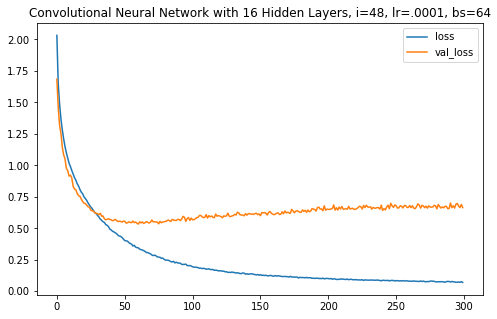

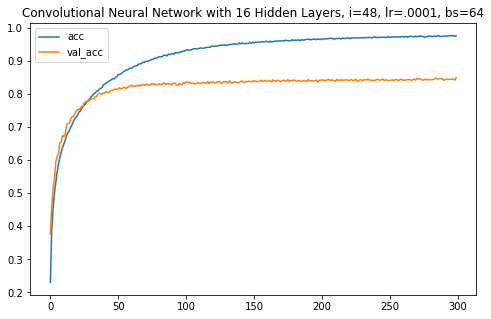

In [14]:
plt.figure(figsize=(8,5));
plt.plot(model48_0001_64.history['loss']);
plt.plot(model48_0001_64.history['val_loss']);
plt.legend(['loss','val_loss']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001, bs=64');
plt.savefig('48000164_300l.png')

plt.figure(figsize=(8,5));
plt.plot(model48_0001_64.history['acc']);
plt.plot(model48_0001_64.history['val_acc']);
plt.legend(['acc','val_acc']);
plt.title('Convolutional Neural Network with 16 Hidden Layers, i=48, lr=.0001, bs=64');
plt.savefig('48000164_300a.png')

See Final Report, Appendix A, for summary of various configurations and results.

https://github.com/coneeleven/Image-Classification-Project/blob/master/Capstone%202%20CIFAR10%20Image%20Classifcation%20Final%20Report.pdf